In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eq-inv-ml/factors.parquet.gzip
/kaggle/input/eq-inv-ml/DA.parquet.gzip
/kaggle/input/eq-inv-ml/msf.parquet.gzip
/kaggle/input/eq-inv-ml/arkk.parquet.gzip
/kaggle/input/eq-inv-ml/brk.parquet.gzip
/kaggle/input/eq-inv-ml/famafrench.parquet.gzip
/kaggle/input/eq-inv-ml/fund.parquet.gzip
/kaggle/input/eq-inv-ml/cons_forecasts.parquet.gzip
/kaggle/input/eq-inv-ml/Data Menu.xlsx
/kaggle/input/eq-inv-ml/MSCI_smartbeta.parquet.gzip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# List the files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/eq-inv-ml/factors.parquet.gzip
/kaggle/input/eq-inv-ml/DA.parquet.gzip
/kaggle/input/eq-inv-ml/msf.parquet.gzip
/kaggle/input/eq-inv-ml/arkk.parquet.gzip
/kaggle/input/eq-inv-ml/brk.parquet.gzip
/kaggle/input/eq-inv-ml/famafrench.parquet.gzip
/kaggle/input/eq-inv-ml/fund.parquet.gzip
/kaggle/input/eq-inv-ml/cons_forecasts.parquet.gzip
/kaggle/input/eq-inv-ml/Data Menu.xlsx
/kaggle/input/eq-inv-ml/MSCI_smartbeta.parquet.gzip


In [3]:
fund=pd.read_parquet('../input/eq-inv-ml/fund.parquet.gzip')
fund['date']=pd.to_datetime(fund['date'])
fund['InfoPublDate']=pd.to_datetime(fund['InfoPublDate'])
fund['EndDate']=pd.to_datetime(fund['EndDate'])

msf=pd.read_parquet('../input/eq-inv-ml/msf.parquet.gzip')
msf['date']=pd.to_datetime(msf['date'])

In [4]:
fund.head()

,SecuCode,date,InfoPublDate,EndDate,CompanyType,cash_q0,cash_q1,cash_q2,cash_q3,cash_q4,...,ocfio_q16,ocfio_q17,ocfio_q18,ocfio_q19,ocfio_0,ocfio_1,ocfio_2,ocfio_3,ocfio_4,ttm_div
0,000001,2007-12-28,2007-10-23,2007-09-30,13,3.222422e+10,2.749131e+10,2.365272e+10,2.628818e+10,3.828696e+10,...,NaN,NaN,NaN,NaN,0.00,0.00,0.00,-1.00,0.0,1.268426e+07
1,000002,2007-12-28,2007-10-30,2007-09-30,99,2.238796e+10,1.208594e+10,9.223753e+09,1.074370e+10,5.459989e+09,...,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,6.554848e+08
2,000005,2007-12-28,2007-10-29,2007-09-30,99,4.213289e+07,4.313219e+07,4.065224e+07,4.156708e+07,4.442187e+07,...,0.0,NaN,NaN,NaN,0.00,0.00,0.00,-3243933.29,0.0,0.000000e+00
3,000006,2007-12-28,2007-10-30,2007-09-30,99,1.042411e+09,2.255063e+08,3.040317e+08,3.231899e+08,NaN,...,NaN,NaN,NaN,NaN,0.00,65440332.32,-498140.15,828099.14,0.0,8.875707e+07
4,000009,2007-12-28,2007-10-27,2007-09-30,99,8.205850e+08,8.457373e+08,7.710181e+08,7.843169e+08,7.171211e+08,...,NaN,NaN,NaN,NaN,36596187.57,-9573319.34,45521916.19,890794.84,0.0,0.000000e+00


In [5]:
msf.head()

,SecuCode,SecuAbbr,date,prc,dvol,Adjfac,ret,AFloats,TotalShares,rvol20d,...,pret20d,pret60d,pret125d,pret250d,float,totcap,indcode,indname,sturn,ret1
0,000001,平安银行,2007-12-28,38.60,1.613578e+10,25.9629,0.069845,2.293407e+09,2.293407e+09,0.026541,...,0.069845,-0.034517,0.402616,2.127629,8.852552e+10,8.852552e+10,480000.0,Banking,0.202655,-0.137306
1,000001,平安银行,2008-01-31,33.30,1.944769e+10,25.9629,-0.137306,2.293407e+09,2.293407e+09,0.039502,...,-0.108434,-0.233602,-0.080872,1.024386,7.637046e+10,7.637046e+10,480000.0,Banking,0.216017,-0.004505
2,000001,平安银行,2008-02-29,33.15,8.671296e+09,25.9629,-0.004505,2.293407e+09,2.293407e+09,0.041544,...,-0.129693,-0.030702,-0.140969,0.775004,7.602645e+10,7.602645e+10,480000.0,Banking,0.110184,-0.149321
3,000001,平安银行,2008-03-31,28.20,1.821267e+10,25.9629,-0.149321,2.293407e+09,2.293407e+09,0.046278,...,-0.145455,-0.276923,-0.216013,0.555371,6.467408e+10,6.467408e+10,480000.0,Banking,0.281160,0.050355
4,000001,平安银行,2008-04-30,29.62,1.421940e+10,25.9629,0.050355,2.293407e+09,2.293407e+09,0.047418,...,0.061268,-0.170773,-0.335576,0.442130,6.793072e+10,6.793072e+10,480000.0,Banking,0.229329,-0.148211


In [6]:
#Merge fund and msf
fund=fund.merge(msf[['SecuCode','date','totcap','pret20d','pret250d']],on=['SecuCode','date'],how='left')

# Fill in the missing values of mi_0, mi_1, finexp_0, adminexp_0 with zero
fund['mi_0'].fillna(0, inplace=True)
fund['mi_1'].fillna(0, inplace=True)
fund['finexp_0'].fillna(0, inplace=True)
fund['adminexp_0'].fillna(0, inplace=True)

In [7]:
#Calculate book value of equity
fund['bv_0']=fund['te_0']-fund['mi_0']
fund['bv_1']=fund['te_1']-fund['mi_1']

# If book value < 0, we set it as missing
fund.loc[fund.bv_0<0,'bv_0']=np.nan
fund.loc[fund.bv_1<0,'bv_0']=np.nan


fund['size']=np.log(fund['totcap'])
fund['b2p']=fund['bv_0']/fund['totcap']

In [8]:
# Please add your code to contruct the profitability, investment , and momentum factors here:
# Profitability factor
fund['oproe'] = (fund['oprev_0']-fund['opcost_0']-fund['finexp_0']-fund['adminexp_0'])/fund['bv_1'] 

In [9]:
#Investment factor
fund['agro'] = -1*(fund['ta_0']-fund['ta_1'])/fund['ta_1'] 

In [10]:
# momentum factor
fund['mom'] = msf['pret250d'] - msf['pret20d'] 

In [11]:
fund=fund.replace([np.inf, -np.inf], np.nan)
fund.loc[(fund.oproe<-1) | (fund.oproe>1),'oproe']=np.nan
fund.loc[(fund.agro<-1) | (fund.agro>1),'agro']=np.nan
fund[['size','b2p','oproe','agro','mom']].describe()

,size,b2p,oproe,agro,mom
count,242357.000000,241418.000000,233561.000000,229541.000000,234237.000000
mean,22.935068,0.401888,0.235974,-0.156412,0.158114
std,1.041907,0.284231,0.216743,0.213070,0.679316
min,19.976125,0.000183,-0.998924,-0.999941,-1.750815
25%,22.220895,0.203677,0.092335,-0.240048,-0.221879
50%,22.772623,0.328328,0.188368,-0.112476,0.005564
75%,23.456310,0.519478,0.337055,-0.027741,0.351092
max,28.827120,6.272551,0.999968,0.993357,36.754234


In [12]:
# This is the definition of our PortAnalysis function
def PortAnalysis(dfin,sig,ngroup):

    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    from IPython.display import display, HTML
    import math

    sdf=dfin[['SecuCode','date',sig]].dropna(subset=[sig])
    sdf=sdf.merge(msf[['SecuCode','date','ret1']].dropna(subset=['ret1']),on=['SecuCode','date'],how='inner')

    sdf['sig_rank'] = sdf.groupby(['date'])[sig].transform(lambda x: pd.qcut(x.rank(method='first'), ngroup, labels=range(1,ngroup+1)))

    avgret=pd.DataFrame(sdf.groupby(['date'])['ret1'].mean()) # calculate average future returns in general
    sigret=pd.DataFrame(sdf.groupby(['date', 'sig_rank'])['ret1'].mean()) # calculate average future returns in different subgroups sorted by the factor
    avgret.reset_index(inplace=True)
    sigret.reset_index(inplace=True)   
    avgret.rename(columns={'ret1': 'avg_ret'}, inplace=True)
    sigret=pd.merge(sigret, avgret, on='date', how='inner')
    sigret['act_ret']=sigret['ret1']-sigret['avg_ret']

    retvar='ret1'

    sigret=sigret.sort_values(axis=0,ascending=True,by=['sig_rank','date'])   
    sigret.sig_rank = sigret.sig_rank.astype(int)
    sigret['sig_rank']=sigret['sig_rank']+100
    sigret['sig_rank']=sigret['sig_rank'].astype(str)
    sigret['sig_rank']="G"+sigret.sig_rank.str[-2:]
    sigret['cumactret']=sigret.groupby(['sig_rank'])['act_ret'].cumsum()

    sigret['cumrawret']=sigret.groupby(['sig_rank'])['ret1'].cumsum()

    cumret=sigret.pivot(index='date', columns='sig_rank', values='cumactret')
    cumret['GH']=cumret['G'+str(100+ngroup)[-2:]]-cumret['G01']


    cumrawret=sigret.pivot(index='date', columns='sig_rank', values='cumrawret')
    cumrawret['GH']=cumrawret['G'+str(100+ngroup)[-2:]]-cumrawret['G01']


    sigactret=sigret.pivot(index='date', columns='sig_rank', values='act_ret')
    sigactret['GH']=sigactret['G'+str(100+ngroup)[-2:]]-sigactret['G01']
    meanact=12*pd.DataFrame(sigactret.mean())
    stdact=math.sqrt(12)*pd.DataFrame(sigactret.std())
    meanact.rename(columns={0: 'Annualized Active Return'}, inplace=True)
    stdact.rename(columns={0: 'Annualized Active Risk'}, inplace=True)



    sigrawret=sigret.pivot(index='date', columns='sig_rank', values='ret1')
    sigrawret['GH']=sigrawret['G'+str(100+ngroup)[-2:]]-sigrawret['G01']
    meanraw=12*pd.DataFrame(sigrawret.mean())
    stdraw=math.sqrt(12)*pd.DataFrame(sigrawret.std())
    meanraw.rename(columns={0: 'Annualized Return'}, inplace=True)
    stdraw.rename(columns={0: 'Annualized Risk'}, inplace=True)


    Perfact=meanact.join(stdact,how='inner')
    Perfact['Information Ratio']=Perfact['Annualized Active Return']/Perfact['Annualized Active Risk']
    Perfact=Perfact.round({"Information Ratio":3,"Annualized Active Return":4,"Annualized Active Risk":4})


    Perfraw=meanraw.join(stdraw,how='inner')
    Perfraw['Sharpe Ratio']=Perfraw['Annualized Return']/Perfraw['Annualized Risk']
    Perfraw=Perfraw.round({"Sharpe Ratio":3,"Annualized Return":4,"Annualized Risk":4})

    display(Perfraw)

    display(Perfact)

    Perfact.reset_index(inplace=True)
    aa=Perfact.plot(x="sig_rank", y=['Annualized Active Return','Annualized Active Risk'], kind="bar")
    aa.set_ylabel("Annualized Active Return and Risk")
    ax=Perfact['Information Ratio'].plot(secondary_y=True, color='k', marker='o')
    ax.set_ylabel('Information Ratio')

    Perfraw.reset_index(inplace=True)
    ba=Perfraw.plot(x="sig_rank", y=['Annualized Return','Annualized Risk'], kind="bar")
    ba.set_ylabel("Annualized Return and Risk")
    bx=Perfraw['Sharpe Ratio'].plot(secondary_y=True, color='k', marker='o')
    bx.set_ylabel('Sharpe Ratio')


    cumret.reset_index(inplace=True)
    bb=cumret.plot(x="date", y=['G01','G02','G03','G04','G05','GH'], kind="line")   
    bb.set_ylabel('Cumulative Active Returns')


    cumrawret.reset_index(inplace=True)
    cc=cumrawret.plot(x="date", y=['G01','G02','G03','G04','G05','GH'], kind="line")   
    cc.set_ylabel('Cumulative Raw Returns')
    
    return None

,Annualized Return,Annualized Risk,Sharpe Ratio
sig_rank,,,
G01,0.0441,0.3271,0.135
G02,0.0740,0.3315,0.223
G03,0.0867,0.3283,0.264
G04,0.1099,0.3253,0.338
G05,0.1231,0.3077,0.400
GH,0.0790,0.1806,0.437


,Annualized Active Return,Annualized Active Risk,Information Ratio
sig_rank,,,
G01,-0.0435,0.0853,-0.509
G02,-0.0135,0.0480,-0.281
G03,-0.0008,0.0279,-0.030
G04,0.0223,0.0412,0.542
G05,0.0355,0.1021,0.348
GH,0.0790,0.1806,0.437


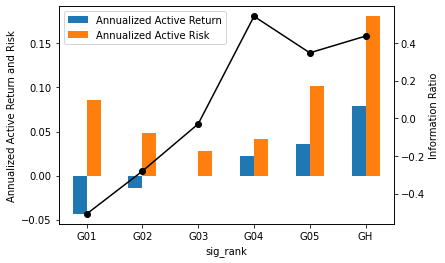

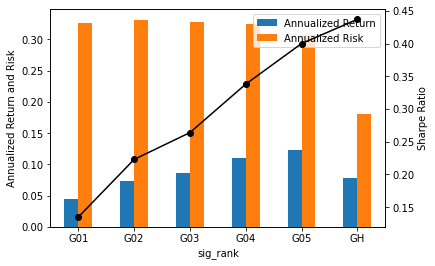

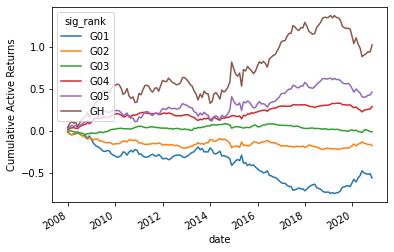

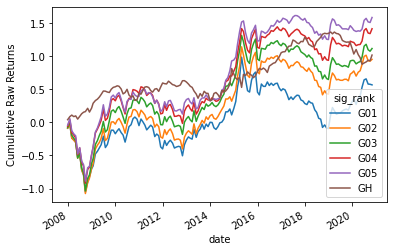

In [13]:
PortAnalysis(fund,'b2p',5)

,Annualized Return,Annualized Risk,Sharpe Ratio
sig_rank,,,
G01,0.0542,0.3366,0.161
G02,0.0820,0.3329,0.246
G03,0.1019,0.3255,0.313
G04,0.1015,0.3158,0.322
G05,0.0982,0.2979,0.330
GH,0.0440,0.1023,0.430


,Annualized Active Return,Annualized Active Risk,Information Ratio
sig_rank,,,
G01,-0.0334,0.0525,-0.635
G02,-0.0056,0.0338,-0.166
G03,0.0144,0.0306,0.470
G04,0.0140,0.0283,0.495
G05,0.0106,0.0610,0.174
GH,0.0440,0.1023,0.430


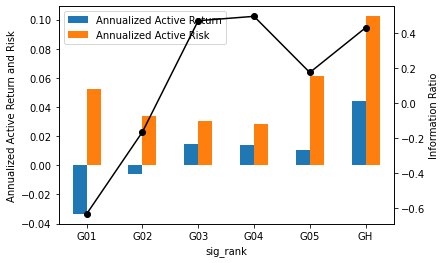

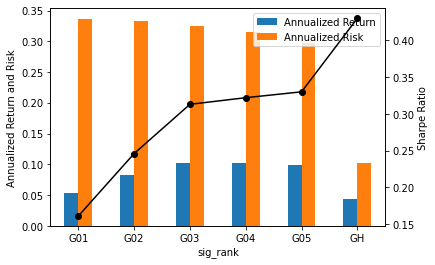

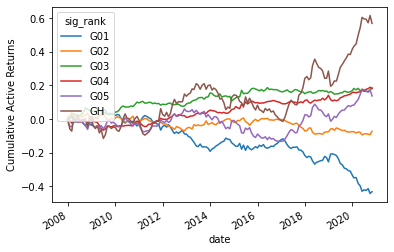

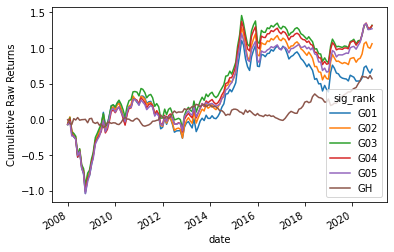

In [14]:
PortAnalysis(fund,'oproe',5)

,Annualized Return,Annualized Risk,Sharpe Ratio
sig_rank,,,
G01,0.1667,0.3532,0.472
G02,0.1028,0.3418,0.301
G03,0.0645,0.3288,0.196
G04,0.0612,0.3100,0.197
G05,0.0414,0.2830,0.146
GH,-0.1253,0.1768,-0.709


,Annualized Active Return,Annualized Active Risk,Information Ratio
sig_rank,,,
G01,0.0794,0.0744,1.066
G02,0.0155,0.0485,0.320
G03,-0.0228,0.0347,-0.658
G04,-0.0262,0.0354,-0.740
G05,-0.0459,0.1116,-0.412
GH,-0.1253,0.1768,-0.709


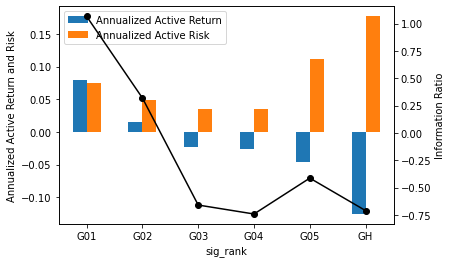

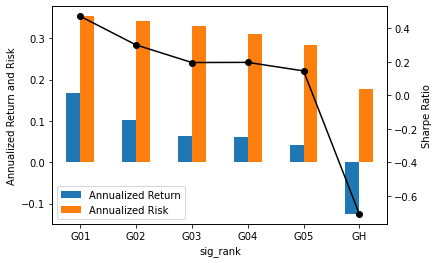

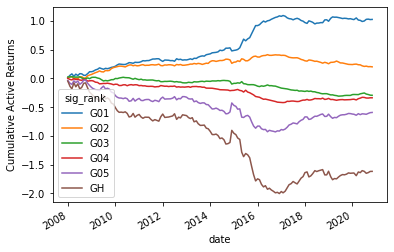

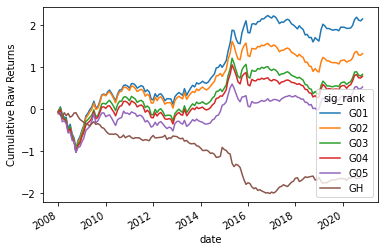

In [15]:
PortAnalysis(fund,'size',5)

,Annualized Return,Annualized Risk,Sharpe Ratio
sig_rank,,,
G01,0.0939,0.3247,0.289
G02,0.1002,0.3143,0.319
G03,0.1037,0.3103,0.334
G04,0.0845,0.3186,0.265
G05,0.0619,0.3280,0.189
GH,-0.0320,0.0787,-0.406


,Annualized Active Return,Annualized Active Risk,Information Ratio
sig_rank,,,
G01,0.0050,0.0428,0.118
G02,0.0114,0.0222,0.512
G03,0.0149,0.0226,0.661
G04,-0.0044,0.0257,-0.170
G05,-0.0269,0.0422,-0.639
GH,-0.0320,0.0787,-0.406


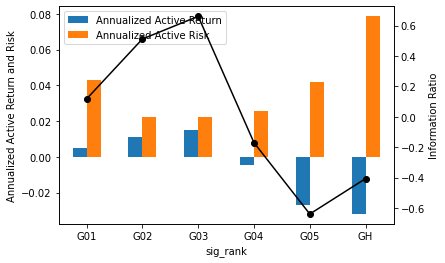

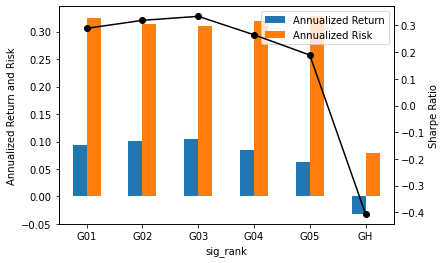

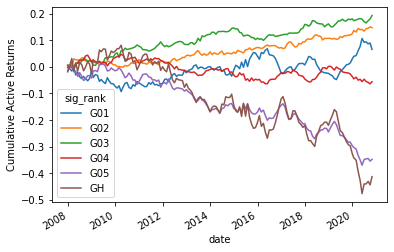

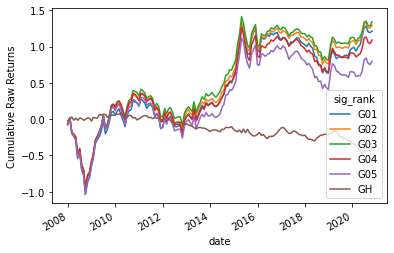

In [16]:
PortAnalysis(fund,'agro',5)

,Annualized Return,Annualized Risk,Sharpe Ratio
sig_rank,,,
G01,0.0944,0.3196,0.295
G02,0.0713,0.3140,0.227
G03,0.0807,0.3217,0.251
G04,0.0939,0.3175,0.296
G05,0.0949,0.3165,0.300
GH,0.0006,0.0340,0.017


,Annualized Active Return,Annualized Active Risk,Information Ratio
sig_rank,,,
G01,0.0073,0.0219,0.333
G02,-0.0157,0.0230,-0.684
G03,-0.0064,0.0230,-0.277
G04,0.0069,0.0191,0.359
G05,0.0079,0.0197,0.401
GH,0.0006,0.0340,0.017


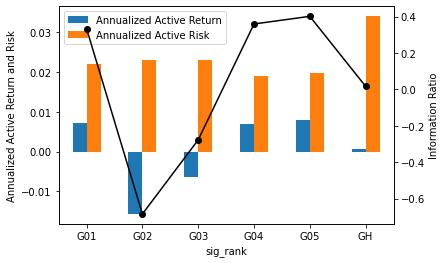

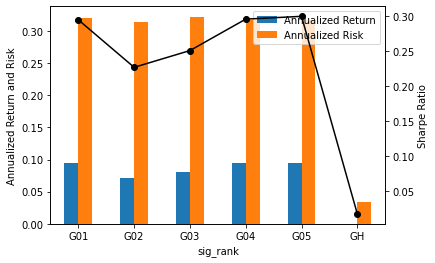

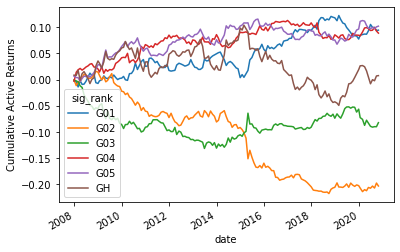

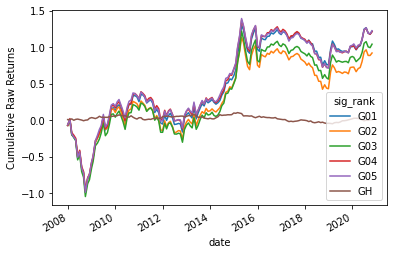

In [17]:
PortAnalysis(fund,'mom',5)